In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the dataset

df = pd.read_csv(r'C:\Mahesh\Datasets\Mall_Customers.csv')

df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df.drop('CustomerID',axis=1,inplace=True)

In [5]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [6]:
df.Gender.replace({"Male":0,"Female":1},inplace=True)

In [7]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40
...,...,...,...,...
195,1,35,120,79
196,1,45,126,28
197,0,32,126,74
198,0,32,137,18


In [8]:
from sklearn.cluster import KMeans

In [9]:
### Elbow method for selecting the K-Value


Wcss =[]

for i in range(1,13):
    cluster = KMeans(init='k-means++',n_clusters = i,random_state=42)
    cluster.fit(df)
    Wcss.append(cluster.inertia_)


In [10]:
cluster_numbers = [i for i in range(1,13)]
cluster_numbers

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [11]:
Wcss

[308862.06,
 212889.442455243,
 143391.59236035674,
 104414.67534220166,
 75427.71182424153,
 58348.64136331505,
 51575.27793107792,
 44359.634641148325,
 40942.511170061174,
 37515.84125504126,
 34221.804728234725,
 32479.79468550713]

Text(0, 0.5, 'WCSS')

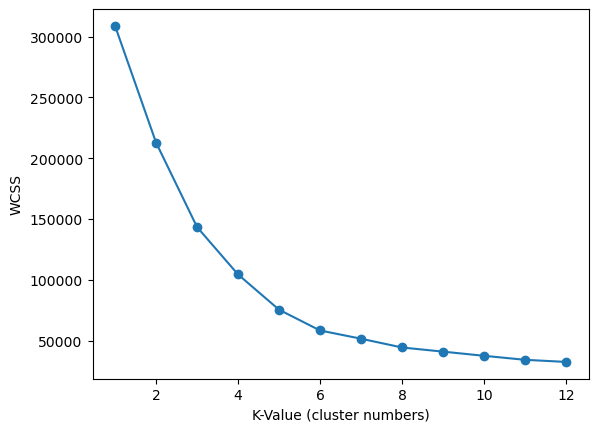

In [12]:
plt.plot(cluster_numbers,Wcss,marker= 'o')
plt.xlabel('K-Value (cluster numbers)')
plt.ylabel('WCSS')

In [13]:
### K-Means Model

cluster = KMeans(init='k-means++',n_clusters = 4,random_state=42)

In [14]:
df['Cluster_No'] =cluster.fit_predict(df)

In [15]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_No
0,0,19,15,39,2
1,0,21,15,81,2
2,1,20,16,6,1
3,1,23,16,77,2
4,1,31,17,40,1
...,...,...,...,...,...
195,1,35,120,79,3
196,1,45,126,28,0
197,0,32,126,74,3
198,0,32,137,18,0


In [16]:
cluster.cluster_centers_

array([[ 0.47368421, 40.39473684, 87.        , 18.63157895],
       [ 0.62105263, 44.89473684, 48.70526316, 42.63157895],
       [ 0.5       , 24.82142857, 28.71428571, 74.25      ],
       [ 0.53846154, 32.69230769, 86.53846154, 82.12820513]])